# Chaos Game in Euclidean Plane

In [1]:
from math import cos, sin, pi
from random import randint
from typing import Callable, List, NamedTuple, Sequence
from pathlib import Path
#--- middle point ---#
from math import acos, cos, sin, sqrt


import matplotlib.pyplot as plt
import matplotlib
# import seaborn as sns
import numpy as np
from numpy.linalg import norm
import plotly.graph_objects as go

from src.chaos_game import (
    get_polygon,
    proceed_euc,
    proceed_sphere,
    proj_plane,
    stereoG3D,
    get_angle,
    get_random_selector,
    create_game,
    plot_game,
    PointConfig,
)

point_configs = {
    'fixed': PointConfig(size=20, color='black'),
    'initial': PointConfig(size=20, color='red'),
    'moving': PointConfig(size=1, color='green'),
}

data_dir = Path('data') / 'euclidean'
if not data_dir.exists():
    data_dir.mkdir(exist_ok=True)

In [57]:
p = 3
start = np.array([1,1])
ratio = 0.2
rounds = 10000
figsize = (8, 8)

fixed_points = np.array(get_polygon(p))
selector = get_random_selector(len(fixed_points))
# Plot fixed points first
game = create_game(
    start=start,
    proceed_func=proceed_euc,
    fixed_points=fixed_points,
    selector=selector,
    ratio=ratio,
    rounds=rounds,
    )

100%|█████████████████████████████████| 10000/10000 [00:00<00:00, 175167.01it/s]


Text(0.5, 0.98, 'Chaos game on Plane:\n')

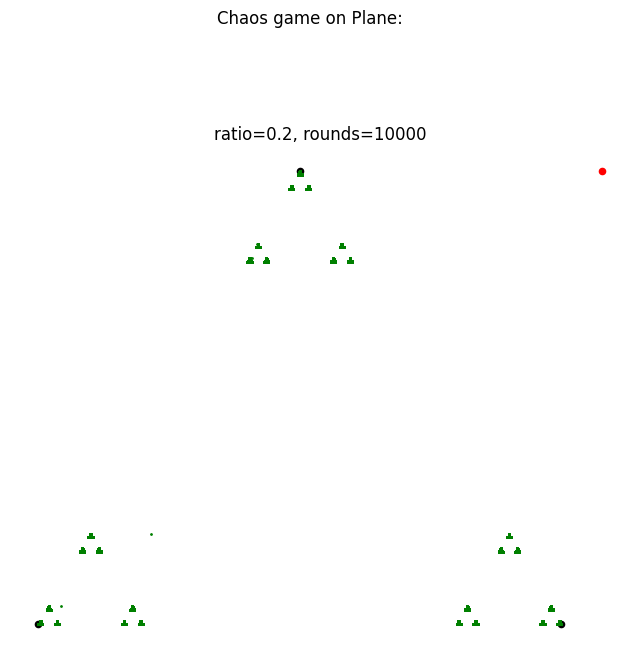

In [58]:
fig, ax = plt.subplots(figsize=figsize)

plot_game(ax, game,
         point_configs=point_configs)
#--- text to show ---#
title = "Chaos game on Plane:\n"
plt.suptitle(title)

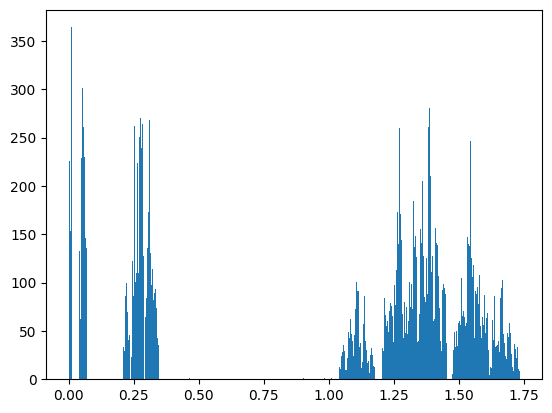

In [59]:
rng = np.random.default_rng()

dists = np.array([])
p1 = game.points[0]
remain = game.points[1:]
for _ in range(20000):
    s1, s2 = rng.integers(low=0, high=len(game.points), size=2)
    dists = np.append(dists, norm(game.points[s1] - game.points[s2]))


plt.hist(dists, bins=500, range=(0, norm(game.fixed_points[0] - fixed_points[1])))
plt.show()

array([9836, 8761])

Text(0.5, 0.98, 'Chaos game on Plane:\n')

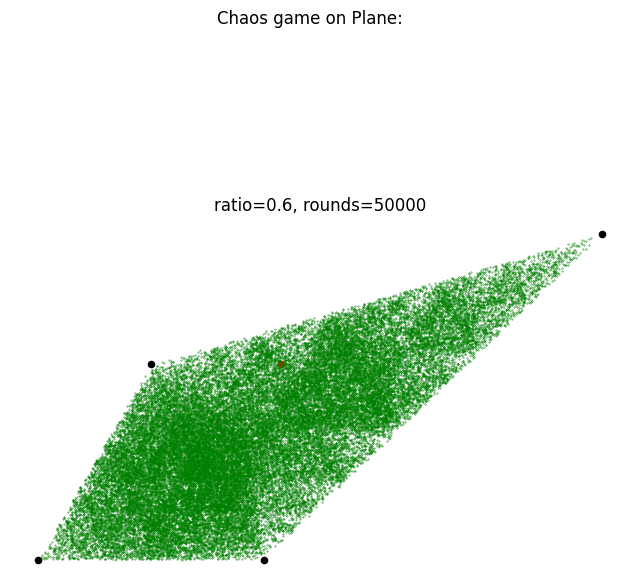

In [9]:
p = 3
start = np.array([1,1])
ratio = 0.6
rounds = 50000
figsize = (8, 8)

fixed_points = np.array(get_polygon(p))
extra_point = 2*(fixed_points[0]-fixed_points[2]+fixed_points[1])
fixed_points = np.append(fixed_points, [extra_point], axis=0)
selector = get_random_selector(len(fixed_points))

# Plot fixed points first
fig, ax = plt.subplots(figsize=figsize)
game = create_game(
    start=start,
    proceed_func=proceed_euc,
    selector=selector,
    fixed_points=fixed_points,
    ratio=ratio,
    rounds=rounds,
    )

point_configs.update({'moving': PointConfig(size=0.1, color='green')})

plot_game(ax, game,
         point_configs=point_configs)

#--- text to show ---#
title = "Chaos game on Plane:\n"
plt.suptitle(title)

Text(0.5, 0.98, 'Chaos game on Plane:\n')

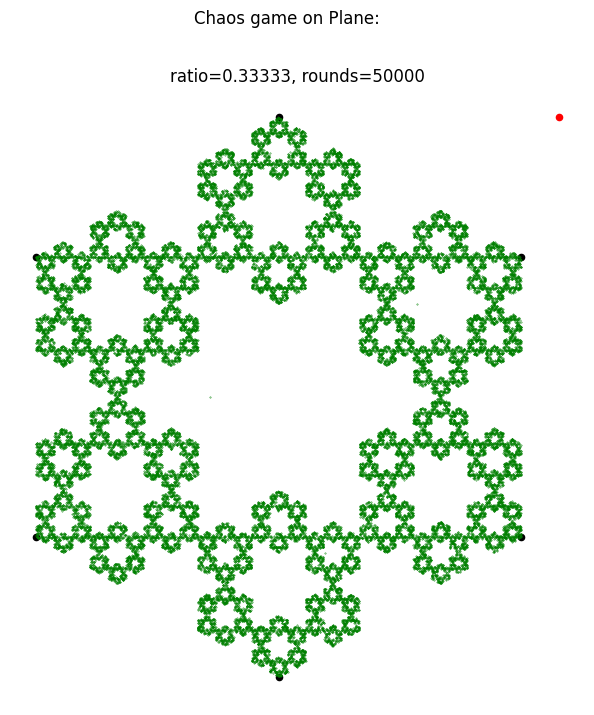

In [44]:
p = 6
start = np.array([1,1])
ratio = 1/3
rounds = 50000
figsize = (8, 8)


fixed_points = np.array(get_polygon(p))
selector = get_random_selector(len(fixed_points))

# Plot fixed points first
fig, ax = plt.subplots(figsize=figsize)
game = create_game(
    start=start,
    proceed_func=proceed_euc,
    selector=selector,
    fixed_points=fixed_points,
    ratio=ratio,
    rounds=rounds,
    )
point_configs.update({'moving':{'size': 0.1,
                                'color': 'green'}})
plot_game(ax, game,
         point_configs=point_configs)
#--- text to show ---#
title = "Chaos game on Plane:\n"
plt.suptitle(title)

In [14]:
p = 20
start = np.array([1,1])
ratio = 1/5
rounds = 10000
figsize = (8, 8)


fixed_points = np.array(get_polygon(p))
selector = get_random_selector(len(fixed_points))


game = create_game(
    start=start,
    proceed_func=proceed_euc,
    selector=selector,
    fixed_points=fixed_points,
    ratio=ratio,
    rounds=rounds,
    )

100%|█████████████████████████████████| 10000/10000 [00:00<00:00, 155391.79it/s]


Text(0.5, 0.98, 'Chaos game on Plane:\n')

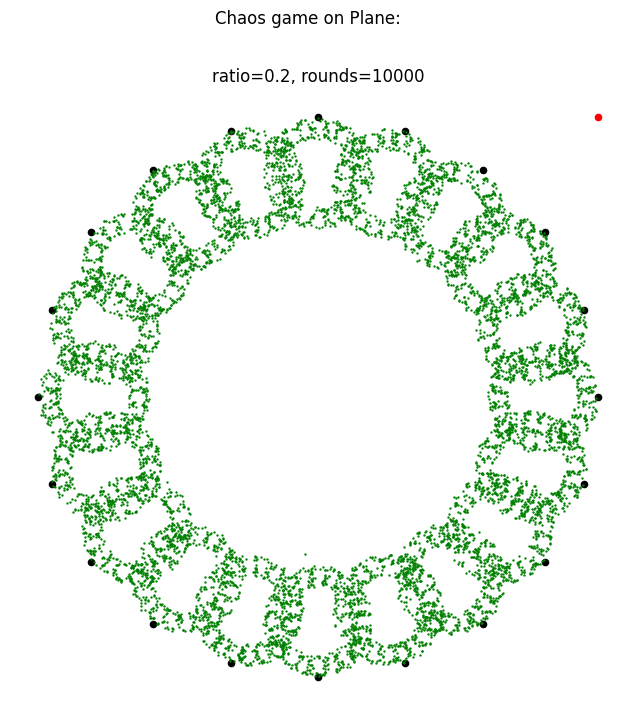

In [16]:
# Plot fixed points first
fig, ax = plt.subplots(figsize=figsize)
point_configs.update({'moving':PointConfig(size=0.5, color='green')})
plot_game(ax, game,
         point_configs=point_configs)
# ax.set_xlim(xmin=-0.2, xmax=0.2)
# ax.set_ylim(ymin=0.8, ymax=1.2)
#--- text to show ---#
title = "Chaos game on Plane:\n"
plt.suptitle(title)

In [ ]:
np.savez(f'p{p}_ratio{ratio}_rounds{rounds}.npz', **{"name": 'hoge'})

100%|█████████████████████████████████| 20000/20000 [00:00<00:00, 121671.90it/s]


Text(0.5, 0.98, 'Chaos game on Plane:\n')

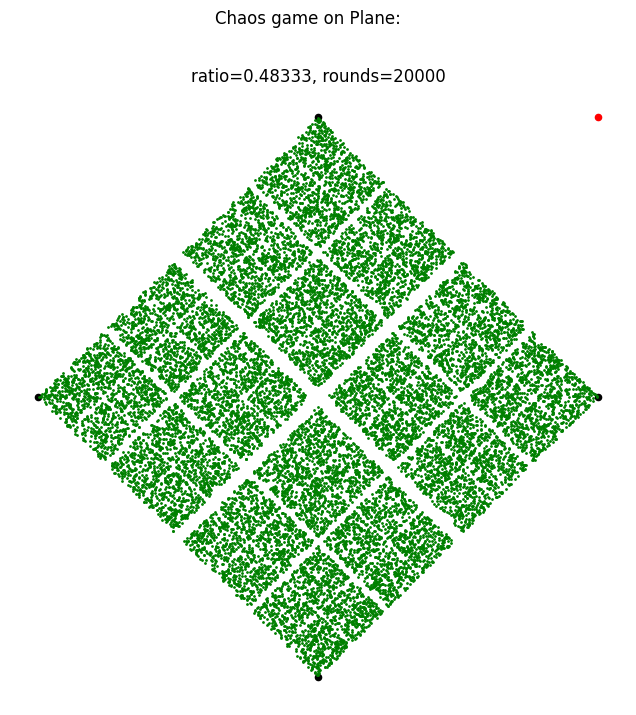

In [13]:
p = 4
t = 0.9
ratio = t*1/2 + (1-t)*1/3
rounds = 20000
start = np.array([1,1])
fixed_points = np.array(get_polygon(p))
selector = get_random_selector(len(fixed_points))

# Plot fixed points first
figsize = (8, 8)
fig, ax = plt.subplots(figsize=figsize)
game = create_game(
    start=start,
    proceed_func=proceed_euc,
    selector=selector,
    fixed_points=fixed_points,
    ratio=ratio,
    rounds=rounds,
    )

point_configs.update({'moving':PointConfig(size=0.5, color='green')})
plot_game(
    ax,
    game,
    )
#--- text to show ---#
title = "Chaos game on Plane:\n"
plt.suptitle(title)

Text(0.5, 0.98, 'Chaos game on Plane:\n')

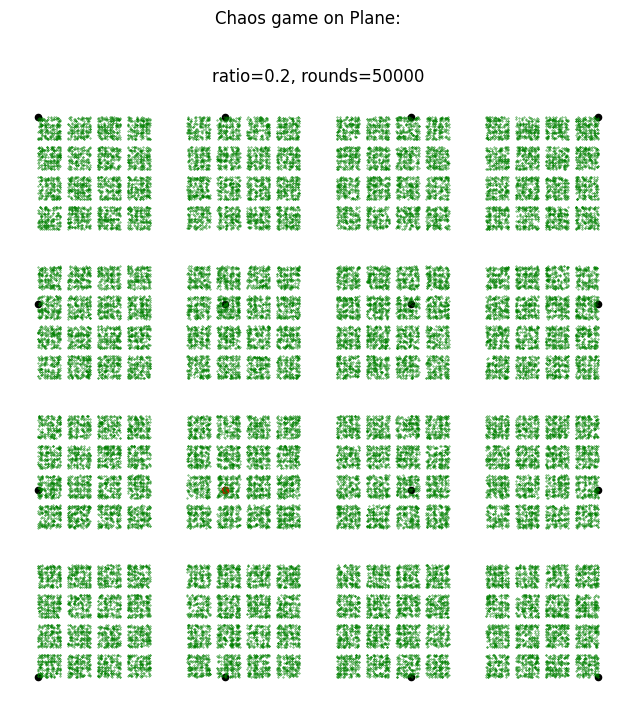

In [41]:
t = 1
# ratio = t*1/3 + (1-t)*1/4
ratio = 1/5
# ratio = -0.3
rounds = 50000

# fixed_points = np.array(get_polygon(p))
# fixed_points = np.array([[1,1],[0,1],[-1,1],[1,0],[0,0],[-1,0],[1,-1],[0,-1],[-1,-1]])
p = 4
fixed_points = np.array([(i, j) for i in range(p) for j in range(p)])

# Plot fixed points first
fig, ax = plt.subplots(figsize=figsize)
game = create_game(
    start=start,
    proceed_func=proceed_euc,
    fixed_points=fixed_points,
    ratio=ratio,
    rounds=rounds,
    )
plot_game(
    ax,
    game,
    point_configs = {'fixed':{'size': 20,
                            'color':'black'},
                    'initial':{'size': 20,
                               'color':'red'},
                    'moving':{'size': 0.1,
                              'color': 'green'},
                   },
    )
#--- text to show ---#
title = "Chaos game on Plane:\n"
plt.suptitle(title)

In [10]:
# with open('test.npz', 'w') as fp:
np.savez('test.npz', **game._asdict())
npzfile = np.load('test.npz')
npzfile.items()

ItemsView(NpzFile 'test.npz' with keys: fixed_points, ratio, rounds, points)

In [18]:
hash(game.points.tobytes())

-7081356904929346176